In [30]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [31]:
titanic_train=pd.read_csv('/kaggle/input/titanic-kaggle/train.csv')
titanic_test=pd.read_csv('/kaggle/input/titanic-kaggle/test.csv')

In [32]:
# checking duplicates

titanic_train.duplicated().sum()

0

In [33]:
titanic_test.duplicated().sum()

0

In [34]:
# print(titanic_train.head())
titanic_train.head()
# titanic_train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_test.head()
print(titanic_test.shape,titanic_train.shape)

(418, 11) (891, 12)


In [36]:
# simply adding new column 'data'
titanic_train['data']='train'
titanic_test['data']='test'
print(titanic_test.shape,titanic_train.shape)

(418, 12) (891, 13)


In [37]:
# Merging 2 dataset
all_data = pd.concat([titanic_train, titanic_test],axis=0)

In [38]:
all_data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [39]:
all_data.shape
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


# **Data Pre-processing**

# ***1) Handling Missing Values***

In [40]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [41]:
all_data.isnull().sum()/ len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

**Dropping columns - Cabin,PassengerId, Name, Ticket, Fare**

Dropping cabin as it has 77% null values and class is also given which specifies the same

In [42]:
all_data = all_data.drop(['PassengerId','Ticket','Name','Fare','Cabin' ],axis=1)

In [43]:
# all_data.head()
# all_data.info()
all_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027
std,0.486592,0.837836,14.413493,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


looks like age is having outlier as max=80 but 75% pepole has age only 39
But as it is possible situation so not removing outlier

<Axes: ylabel='Age'>

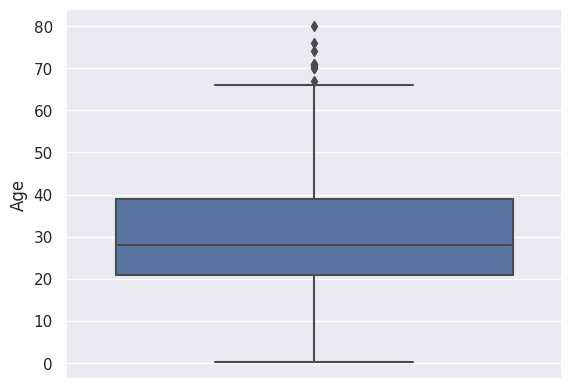

In [44]:
sns.boxplot(y='Age',data=all_data)

In [45]:
 all_data['Age'] = all_data['Age']. fillna(all_data['Age'].median())

In [46]:
# Embarked
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [47]:
 all_data['Embarked'] = all_data['Embarked']. fillna('S')

In [48]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
data          0
dtype: int64

<Axes: ylabel='Age'>

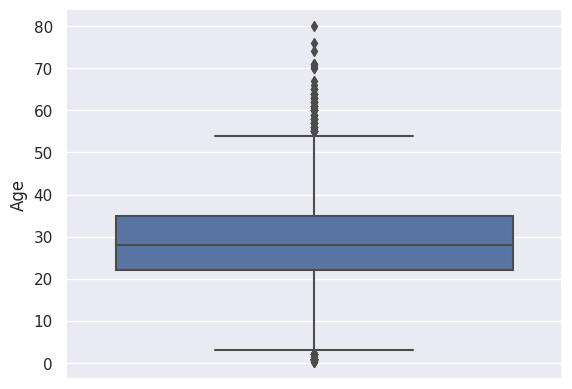

In [49]:
sns.boxplot(y='Age',data=all_data)

In [62]:
#check all unique values
for i in all_data.columns:
  print("***********************************************",i,"******************************")
  print()
  print(set(all_data[i].tolist()))
  print()

*********************************************** Survived ******************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [61]:
#check all unique values
for i in all_data.columns:
  print("***********************************************",i,"******************************")
  print()
  print(set(all_data[i]))
  print()

*********************************************** Survived ******************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

# ***2) Encoding - Pclass, sex, Embarked***

In [51]:
print(all_data['Pclass'].value_counts())
print()
print(all_data['Sex'].value_counts())
print()
print(all_data['Embarked'].value_counts())
print()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

Sex
male      843
female    466
Name: count, dtype: int64

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64



In [52]:
# Label encoder for sex as only 2 values
all_data['Sex'] = all_data['Sex'].astype('category')
all_data['Sex'] = all_data['Sex'].cat.codes
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,1,22.0,1,0,S,train
1,1.0,1,0,38.0,1,0,C,train
2,1.0,3,0,26.0,0,0,S,train
3,1.0,1,0,35.0,1,0,S,train
4,0.0,3,1,35.0,0,0,S,train


In [53]:
# Onehot encoder  - Pclass, Embarked
all_data = pd.get_dummies(all_data, columns=['Pclass','Embarked'])
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,False,False,True,False,False,True
1,1.0,0,38.0,1,0,train,True,False,False,True,False,False
2,1.0,0,26.0,0,0,train,False,False,True,False,False,True
3,1.0,0,35.0,1,0,train,True,False,False,False,False,True
4,0.0,1,35.0,0,0,train,False,False,True,False,False,True


In [54]:
# dummy variable (n-1)
all_data = all_data. drop(['Pclass_1','Embarked_C'],axis=1)
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,False,True,False,True
1,1.0,0,38.0,1,0,train,False,False,False,False
2,1.0,0,26.0,0,0,train,False,True,False,True
3,1.0,0,35.0,1,0,train,False,False,False,True
4,0.0,1,35.0,0,0,train,False,True,False,True


# ***3) Removing Outlier - No outliers ***

Majority cases outliers not found in logistic regression as we have sigmoid curve(0,1)

In [55]:
# def boxplot(col):
#   sns.boxplot(all_data[col])
#   plt.show()

# for i in list(all_data.select_dtypes(exclude= ['object']).columns) [0:]:
#   boxplot(i)

# *** 4) Feature Scaling  - not required as it classification***


# ***5)  imbalance check***

Axes(0.125,0.11;0.775x0.77)


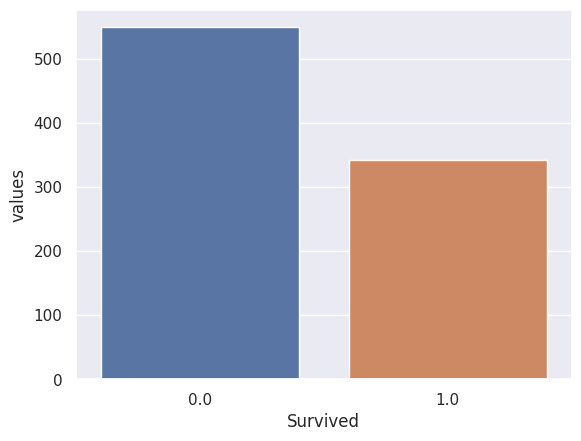

In [56]:
temp = all_data['Survived'].value_counts()
temp_df = pd.DataFrame({ 'Survived' : temp.index, 'values' : temp.values})
print(sns.barplot(x='Survived', y= 'values', data=temp_df))
plt.show()
# by graph its showing as balanced dataset

In [57]:
# by graph its showing as balanced dataset
all_data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

***Pre - processing part completed***

In [67]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         1309 non-null   int8   
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   data        1309 non-null   object 
 6   Pclass_2    1309 non-null   bool   
 7   Pclass_3    1309 non-null   bool   
 8   Embarked_Q  1309 non-null   bool   
 9   Embarked_S  1309 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(1), object(1)
memory usage: 67.8+ KB


# **EDA - Exploratory data analysis**

In [71]:
plt.figure(figsize=(16,16))
sns.heatmap(all_data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

ValueError: could not convert string to float: 'train'

<Figure size 1600x1600 with 0 Axes>

In [72]:
#  pandas profilling EDA part
# DTALE method

!pip install dtale

ERROR: Could not find a version that satisfies the requirement dtale (from versions: none)
ERROR: No matching distribution found for dtale


In [66]:
import dtale
import dtale.app as dtale_app

ModuleNotFoundError: No module named 'dtale'

In [ ]:
dtale_app.USE_COLAB = True
dtale.show(all_data)

# ***splitting data into test and train data for model building and prediction***

In [ ]:
train = all_data[ all_data['data']=='train']
test = all_data[ all_data['data']=='test']

In [ ]:
train.head()

In [ ]:
print(all_data.shape, train.shape, test.shape)

In [ ]:
test.head()

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
# split into dependent and independent

x= train.drop(['Survived','data'], axis=1)
y = train[['Survived']]

In [ ]:
test = test.drop( ['Survived','data'], axis=1)

In [ ]:
test.head()

In [ ]:
# we have to build model and predict with x amd y datset
#splitting data into train and test

from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size=0.25, random_state=1, stratify= y)
# stratify = model takes both 1 and 0 data

# Building logistic Regression moedel with Binary Class**

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

In [ ]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [ ]:
# Evalualte the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_test.head()
y_pred_test

In [ ]:
print( confusion_matrix(y_train, y_pred_train))
print('*****************************')
print( confusion_matrix(y_test, y_pred_test))

In [ ]:
print( classification_report(y_train, y_pred_train))
print('*****************************')
print( classification_report(y_test, y_pred_test))

In [ ]:
# as it is balanced dataset
print( accuracy_score(y_train, y_pred_train))
print('*****************************')
print( accuracy_score(y_test, y_pred_test))

# ***Cross validation of the model***

In [ ]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model,x_train, y_train, cv=10)
testing_accuracy = cross_val_score(logit_model, x_test, y_test, cv=10)
print("Train Accuracy: ", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy",training_accuracy.max())
print()
print("Test Accuracy: ", testing_accuracy)
print()
print("Test Mean Accuracy", testing_accuracy.mean())
print()
print("Test Max Accuracy",testing_accuracy.max())

take mean values

in competitions go with max value and give cv=15+

# **ROC and AUC**

In [ ]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC Curve (area =%0.2f)" %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("ROC with AUC ")
plt.legend(loc='lower right')
plt.show()

TPR = 0.78 and FPR <0.2 , hence good model

# ***Final Part***
**Predict the result of test dataset where we don't have "Survived" column**

In [ ]:
test.shape

In [ ]:
final_result = logit_model.predict(test)

In [ ]:
final_result_1 = pd.concat([test, pd.DataFrame(final_result)], axis=1)


In [ ]:
final_result_1.shape

In [ ]:
final_result_1 = final_result_1.rename(columns= {0: "Survived"})

In [ ]:
final_result_1

***to Kaggle only passenger_id n survived columns should be submitted***

so concat test.csv n survived.
drop columns other than passenger_id n survived

In [ ]:
# titanic_test1=pd.read_csv('test.csv')

In [ ]:
final_result_2 = final_result_1[['Survived']]

final_result_2

In [ ]:
titanic_test_submission = pd.concat([titanic_test1,final_result_2], axis=1)
titanic_test_submission

In [ ]:
titanic_test_submission = titanic_test_submission.drop(['Pclass','Ticket','Name','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'],axis=1)

In [ ]:
titanic_test_submission

In [ ]:
titanic_test_submission.to_csv('final_titanic_test_submission.csv')

# **THE END**

# **Multi-Class Classification**

In [ ]:
import seaborn as sns